In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set;

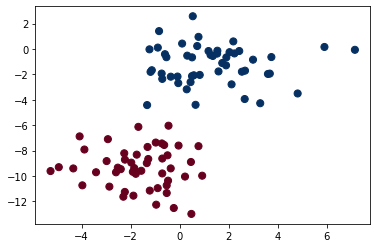

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu');

In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

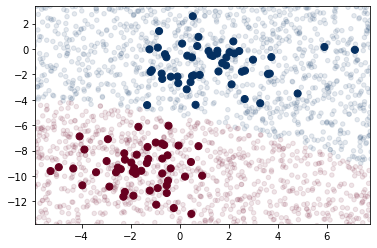

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'RdBu', alpha = 0.1)
plt.axis(lim);

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [8]:
from sklearn.datasets import fetch_20newsgroups

In [9]:
data = fetch_20newsgroups()

In [10]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [12]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

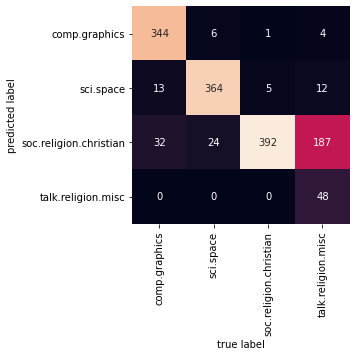

In [15]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = train.target_names,
           yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('sending a payload to the ISS')

'sci.space'

In [18]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [19]:
predict_category('determining the screen resolution')

'comp.graphics'

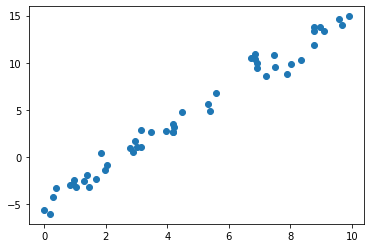

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

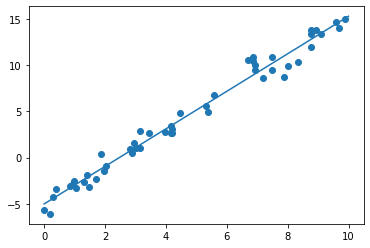

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [23]:
print('Model Slope\t:', model.coef_[0])
print('Model Intercept\t:', model.intercept_)

Model Slope	: 2.027208810360696
Model Intercept	: -4.9985770855532055


In [24]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., -1.])

In [25]:
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

0.5000000000000142
[ 1.5 -2.  -1. ]


In [26]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [27]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [28]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [29]:
poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

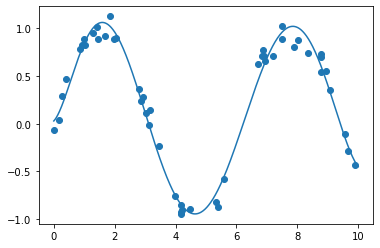

In [30]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

In [32]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian Features for one-dimensional input"""
    
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y = None):
        #Create N centers along the data range
        
        self.centers_ = np.linspace(X.min(), x.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis = 1)

In [33]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

In [34]:
gauss_model.fit(x[:, np.newaxis], y)

yfit = gauss_model.predict(xfit[:, np.newaxis])

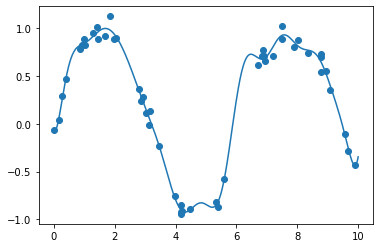

In [35]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

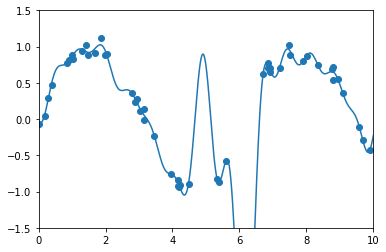

In [36]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [37]:
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel = 'basis location', ylabel = 'coefficient', xlim = (0, 10))

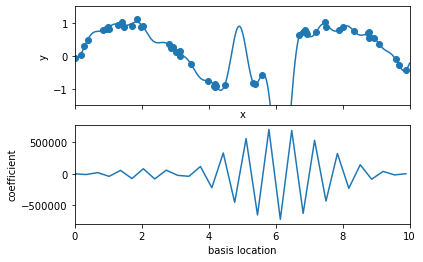

In [38]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

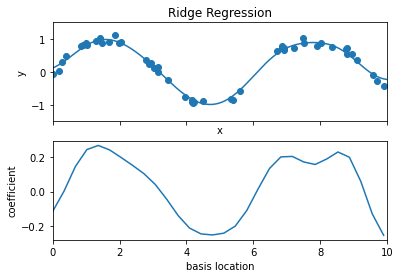

In [40]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge())
basis_plot(model, title = 'Ridge Regression')

C:\Users\U\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


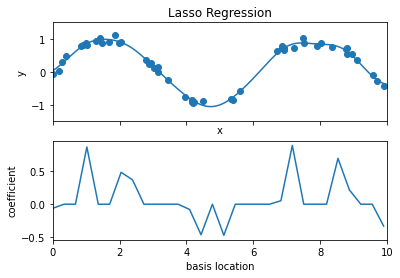

In [42]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.001))
basis_plot(model, title = 'Lasso Regression');